# Final Project Code
## author: Abigail Sandquist
## NUID: 002288985
## DS 2500 Intermediate Programming
## 11/25/2024

questions: Are states with a larger personal income more likely to pursue advanced degrees? 
How does this change throughout different years? 
How does access to other educational resources affect this? 

In [3]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
STATE_NAMES = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

In [5]:
# create DataFrames
pi_df = pd.read_csv("data/SAINC1_ALL_AREAS_1929_2023.csv")
enrollment_df = pd.read_csv("data/Charter_Enrollment_By_State.csv", encoding='cp1252')
education_df = pd.read_csv("data/Education.csv", encoding='cp1252')
pi_df

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1929,1930,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"""00000""",United States,,SAINC1,1.0,...,Personal income (millions of dollars),Millions of dollars,85151.0,76394.0,...,14778160.0,15467113.0,15884741.0,16658962.0,17514402.0,18349584.0,19600945.0,21403979.0,22077232.0,23380269.0
1,"""00000""",United States,,SAINC1,2.0,...,Population (persons) 1/,Number of persons,121769000,123075000,...,319270047.0,321829327.0,324367742.0,326623063.0,328542157.0,330233102.0,331526933.0,332048977.0,333271411.0,334914895.0
2,"""00000""",United States,,SAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,699,621,...,46287.0,48060.0,48971.0,51004.0,53309.0,55566.0,59123.0,64460.0,66244.0,69810.0
3,"""01000""",Alabama,5,SAINC1,1.0,...,Personal income (millions of dollars),Millions of dollars,843.2,697.5,...,179487.1,187474.7,190871.8,197963.8,205674.2,215151.8,230732.2,254960.4,262235.6,276925.6
4,"""01000""",Alabama,5,SAINC1,2.0,...,Population (persons) 1/,Number of persons,2644000,2647000,...,4886793.0,4908162.0,4930595.0,4952202.0,4976395.0,5003418.0,5031864.0,5050380.0,5073903.0,5108468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,"""98000""",Far West *,8,SAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,905,812,...,49358.0,52277.0,54118.0,56427.0,59137.0,62240.0,67465.0,73895.0,74517.0,78843.0
180,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,SAINC1: State annual personal income summary: ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,"Last updated: September 27, 2024-- revised sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# clean pi_df
pi_df['GeoFIPS'] = pi_df['GeoFIPS'].str.strip()
pi_df['GeoName'] = pi_df['GeoName'].str.strip()
pi_df['GeoFIPS'] = pi_df['GeoFIPS'].str.replace('"', '')
pi_df = pi_df[pi_df['GeoFIPS'].str.isnumeric()]

#removing unnessecary rows
#https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p
pi_df = pi_df[pi_df['GeoFIPS'].str.startswith('00000') == False]
pi_df = pi_df[pi_df['GeoName'].str.contains('Far West', na=False) == False]
pi_df = pi_df[pi_df['GeoName'].str.contains('New England', na=False) == False]
pi_df = pi_df[pi_df['GeoName'].str.contains('Mideast', na=False) == False]
pi_df = pi_df[pi_df['GeoName'].str.contains('Plains', na=False) == False]
pi_df = pi_df[pi_df['GeoName'].str.contains('Great Lakes', na=False) == False]
pi_df = pi_df[pi_df['GeoName'].str.contains('Southeast', na=False) == False]
pi_df = pi_df[pi_df['GeoName'].str.contains('Southwest', na=False) == False]
pi_df = pi_df[pi_df['GeoName'].str.contains('Rocky Mountain', na=False) == False]
pi_df = pi_df[pi_df['Description'].str.contains('Personal income (millions of dollars)', na=False, regex=False) == False]
pi_df = pi_df[pi_df['Description'].str.contains('Population (persons) 1/', na=False, regex=False) == False]
pi_df['GeoName'] = pi_df['GeoName'].str.replace('*', '', regex=False)

# droping nulls and unneeded columns
pi_df = pi_df.dropna(how="all")
columns_to_drop = ["Region", "TableName", "LineCode", "IndustryClassification", "Unit"]
pi_df = pi_df.drop(columns=columns_to_drop, errors="ignore")

# renaming columns
pi_df = pi_df.rename(columns={
    'GeoFIPS': 'FIPS',
    'GeoName': 'State',
    'Description': 'Metric'
})


pi_df = pi_df.reset_index(drop=True)
pi_df

,FIPS,State,Metric,1929,1930,1931,1932,1933,1934,1935,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,01000,Alabama,Per capita personal income (dollars) 2/,319,263,220,159,164,207,216,...,36729.0,38197.0,38712.0,39975.0,41330.0,43001.0,45854.0,50483.0,51683.0,54209.0
1,02000,Alaska,Per capita personal income (dollars) 2/,(NA),(NA),(NA),(NA),(NA),(NA),(NA),...,55098.0,56714.0,55535.0,56499.0,58997.0,60504.0,61858.0,65563.0,69015.0,71611.0
2,04000,Arizona,Per capita personal income (dollars) 2/,598,518,430,322,309,362,416,...,38220.0,39836.0,41122.0,43208.0,45260.0,47699.0,52042.0,56976.0,58968.0,62543.0
3,05000,Arkansas,Per capita personal income (dollars) 2/,303,224,207,152,153,182,204,...,38218.0,39266.0,40179.0,41402.0,43029.0,43736.0,47103.0,52845.0,55323.0,57635.0
4,06000,California,Per capita personal income (dollars) 2/,994,889,753,584,550,605,665,...,50619.0,53817.0,55863.0,58214.0,60984.0,64219.0,70098.0,76882.0,76941.0,81255.0
5,08000,Colorado,Per capita personal income (dollars) 2/,631,574,472,357,353,372,445,...,50244.0,51394.0,51306.0,54171.0,57794.0,61276.0,64693.0,71706.0,76674.0,80068.0
6,09000,Connecticut,Per capita personal income (dollars) 2/,1029,927,807,627,591,661,715,...,64482.0,66220.0,67550.0,69146.0,72157.0,74176.0,76829.0,81758.0,84994.0,89945.0
7,10000,Delaware,Per capita personal income (dollars) 2/,1031,858,776,591,566,647,706,...,45364.0,47244.0,48192.0,50002.0,52674.0,53780.0,55501.0,59630.0,63964.0,66850.0
8,11000,District of Columbia,Per capita personal income (dollars) 2/,1324,1314,1253,1107,945,963,1031,...,70466.0,74728.0,77453.0,79535.0,82254.0,83664.0,90702.0,97796.0,101015.0,106816.0
9,12000,Florida,Per capita personal income (dollars) 2/,519,468,397,317,289,348,378,...,42865.0,44945.0,45720.0,48439.0,51009.0,53663.0,56540.0,62242.0,64557.0,68703.0


In [7]:
# clean enrollment_df
# dropping rwos and coluns and renaming
enrollment_df = enrollment_df.dropna(subset=['Table 3'])
enrollment_df = enrollment_df[enrollment_df['Table 3'].str.contains('State and district charter status|Table 3', na=False) == False]

enrollment_df = enrollment_df.dropna(how="all")
enrollment_df.columns = ['State', 'District Type', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10']

enrollment_df = enrollment_df.drop(columns="District Type", errors="ignore")
enrollment_df = enrollment_df.reset_index(drop=True)

enrollment_df = enrollment_df.drop(index=[0, 1, 2, 3]).reset_index(drop=True)
enrollment_df = enrollment_df.drop(index=[260, 261, 262]).reset_index(drop=True)

enrollment_df = enrollment_df[enrollment_df['State'] == 'All districts']
enrollment_df.reset_index(drop=True, inplace=True)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html
enrollment_df["State Name"] = STATE_NAMES
enrollment_df.insert(enrollment_df.columns.get_loc('State'), 'State Name', enrollment_df.pop('State Name'))
enrollment_df = enrollment_df.fillna('')

enrollment_df

,State Name,State,2005-06,2006-07,2007-08,2008-09,2009-10
0,Alabama,All districts,"743,626","743,632","744,516","745,668","748,889"
1,Alaska,All districts,"133,288","132,608","131,029","130,662","131,661"
2,Arizona,All districts,"1,094,454","1,065,082","1,087,447","1,087,631","1,077,831"
3,Arkansas,All districts,"474,206","476,409","479,016","478,965","480,559"
4,California,All districts,"6,312,103","6,287,004","6,275,445","6,252,031","6,191,525"
5,Colorado,All districts,"779,826","793,569","801,867","818,443","832,368"
6,Connecticut,All districts,"575,058","574,909","570,626","567,198","563,982"
7,Delaware,All districts,"120,937","122,254","122,574","125,430","126,801"
8,District of Columbia,All districts,"76,876","72,750","78,422","68,681","69,433"
9,Florida,All districts,"2,675,024","2,671,513","2,666,811","2,631,020","2,634,522"


In [8]:
# clean education_df
# dropping rows and columns
education_df = education_df.drop(index=[0, 1]).reset_index(drop=True)
education_df.columns = education_df.iloc[0]
education_df = education_df.drop(index=[0]).reset_index(drop=True)
columns_to_drop = ["2003 Urban Influence Code", "2013 Urban Influence Code", "2013 Rural-urban Continuum Code", "2023 Rural-urban Continuum Code"]
education_df = education_df.drop(columns=columns_to_drop)
education_df = education_df[education_df['State'].str.contains('PR', na=False) == False]

# keep only states not counties 
education_df = education_df[education_df['FIPS Code'].str.endswith('000')]
education_df = education_df.reset_index(drop=True)
education_df = education_df.drop(index=[0]).reset_index(drop=True)

education_df = education_df.fillna('')

education_df.columns

Index(['FIPS Code', 'State', 'Area name',
       'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years), 1980',
       'Percent of adults completing four years of college or higher, 1980',
       'Less than a high school diploma, 1990',


In [9]:
# create sub data frame with advanced degree and personal income per capita fr the years 2018 - 2022
education_df.columns = education_df.columns.str.strip()
pi_df.get("Percent of adults with a bachelor's degree or higher, 2018-22")
pi_ad_df = pi_df[["State", "2018", "2019", "2020", "2021", "2022"]]
pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"]  = education_df["Percent of adults with a bachelor's degree or higher, 2018-22"]
pi_ad_df["avg_pi_2018-22"] = ((pi_ad_df["2018"] +  pi_ad_df["2019"] + pi_ad_df["2020"] + pi_ad_df["2021"] + pi_ad_df["2022"] )/ 5)
pi_ad_df

C:\Users\asand\AppData\Local\Temp\ipykernel_2532\3549612604.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"]  = education_df["Percent of adults with a bachelor's degree or higher, 2018-22"]
C:\Users\asand\AppData\Local\Temp\ipykernel_2532\3549612604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df["avg_pi_2018-22"] = ((pi_ad_df["2018"] +  pi_ad_df["2019"] + pi_ad_df["2020"] + pi_ad_df["2021"] + pi_ad_df["2022"] )/ 5)


,State,2018,2019,2020,2021,2022,"Percent of adults with a bachelor's degree or higher, 2018-22",avg_pi_2018-22
0,Alabama,41330.0,43001.0,45854.0,50483.0,51683.0,27.2,46470.2
1,Alaska,58997.0,60504.0,61858.0,65563.0,69015.0,30.7,63187.4
2,Arizona,45260.0,47699.0,52042.0,56976.0,58968.0,31.8,52189.0
3,Arkansas,43029.0,43736.0,47103.0,52845.0,55323.0,24.7,48407.2
4,California,60984.0,64219.0,70098.0,76882.0,76941.0,35.9,69824.8
5,Colorado,57794.0,61276.0,64693.0,71706.0,76674.0,43.7,66428.6
6,Connecticut,72157.0,74176.0,76829.0,81758.0,84994.0,41.4,77982.8
7,Delaware,52674.0,53780.0,55501.0,59630.0,63964.0,34.5,57109.8
8,District of Columbia,82254.0,83664.0,90702.0,97796.0,101015.0,62.6,91086.2
9,Florida,51009.0,53663.0,56540.0,62242.0,64557.0,32.3,57602.2


In [10]:
# find the correlation between average personal income per capita for each state and the percentage of adults who have a bachelors degree or higher
pi_ad_df["avg_pi_2018-22"] = pd.to_numeric(pi_ad_df["avg_pi_2018-22"], errors='coerce')
pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"] = pd.to_numeric(pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"], errors='coerce')
correlation = pi_ad_df["avg_pi_2018-22"].corr(pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"])
correlation

C:\Users\asand\AppData\Local\Temp\ipykernel_2532\2260762264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df["avg_pi_2018-22"] = pd.to_numeric(pi_ad_df["avg_pi_2018-22"], errors='coerce')
C:\Users\asand\AppData\Local\Temp\ipykernel_2532\2260762264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"] = pd.to_numeric(pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"], errors='coerce')


0.8483246813582825

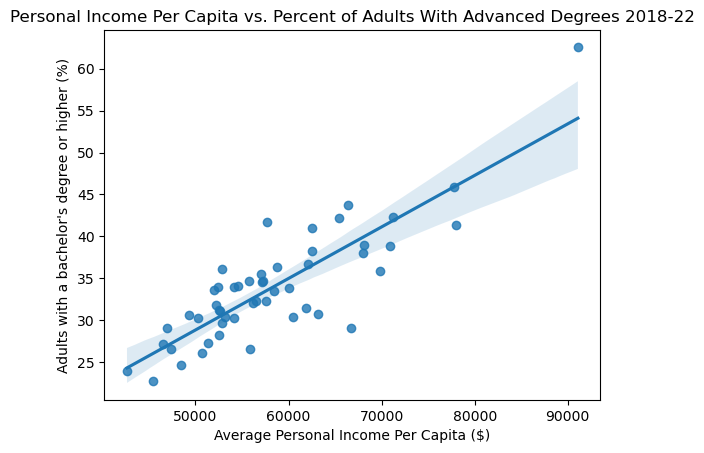

In [11]:
# linear regression plot for the correlation between average personal income per capita for each state and the percentage of adults who have a bachelors degree or higher
sns.regplot(data=pi_ad_df, x="avg_pi_2018-22", y="Percent of adults with a bachelor's degree or higher, 2018-22")
plt.xlabel("Average Personal Income Per Capita ($)")
plt.ylabel("Adults with a bachelor's degree or higher (%)")
plt.title("Personal Income Per Capita vs. Percent of Adults With Advanced Degrees 2018-22")
plt.savefig("PIPC_AD_18-22.png",
                bbox_inches='tight')
plt.show()

In [12]:
# sub data frame containg the same content for the years 2008-1012
pi_ad_df2 = pi_df[["State", "2008", "2009", "2010", "2011", "2012"]]
pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2008-12"]  = education_df["Percent of adults with a bachelor's degree or higher, 2008-12"]
pi_ad_df2["avg_pi_2008-12"] = ((pi_ad_df2["2008"] +  pi_ad_df2["2009"] + pi_ad_df2["2010"] + pi_ad_df2["2011"] + pi_ad_df2["2012"] )/ 5)
pi_ad_df2

C:\Users\asand\AppData\Local\Temp\ipykernel_2532\988619048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2008-12"]  = education_df["Percent of adults with a bachelor's degree or higher, 2008-12"]
C:\Users\asand\AppData\Local\Temp\ipykernel_2532\988619048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df2["avg_pi_2008-12"] = ((pi_ad_df2["2008"] +  pi_ad_df2["2009"] + pi_ad_df2["2010"] + pi_ad_df2["2011"] + pi_ad_df2["2012"] )/ 

,State,2008,2009,2010,2011,2012,"Percent of adults with a bachelor's degree or higher, 2008-12",avg_pi_2008-12
0,Alabama,33441.0,32717.0,33849.0,34887.0,35564.0,22.3,34091.6
1,Alaska,47800.0,47211.0,49543.0,52415.0,53340.0,27.5,50061.8
2,Arizona,35586.0,33467.0,33774.0,35244.0,36333.0,26.6,34880.8
3,Arkansas,32157.0,31411.0,32218.0,34180.0,36287.0,19.8,33250.6
4,California,43391.0,41660.0,43138.0,45509.0,47794.0,30.5,44298.4
5,Colorado,42961.0,40258.0,40827.0,43732.0,45490.0,36.7,42653.6
6,Connecticut,60543.0,59586.0,61392.0,62964.0,63555.0,36.2,61608.0
7,Delaware,41254.0,41056.0,41101.0,43781.0,43775.0,28.5,42193.4
8,District of Columbia,60609.0,60011.0,63182.0,66950.0,67470.0,51.2,63644.4
9,Florida,39185.0,36777.0,38778.0,40433.0,41204.0,26.2,39275.4


In [13]:
# find the correlation between average personal income per capita for each state and the percentage of adults who have a bachelors degree or higher
pi_ad_df2["avg_pi_2008-12"] = pd.to_numeric(pi_ad_df2["avg_pi_2008-12"], errors='coerce')
pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2008-12"] = pd.to_numeric(pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2008-12"], errors='coerce')
correlation = pi_ad_df2["avg_pi_2008-12"].corr(pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2008-12"])
correlation

C:\Users\asand\AppData\Local\Temp\ipykernel_2532\3836635109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df2["avg_pi_2008-12"] = pd.to_numeric(pi_ad_df2["avg_pi_2008-12"], errors='coerce')
C:\Users\asand\AppData\Local\Temp\ipykernel_2532\3836635109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2008-12"] = pd.to_numeric(pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2008-12"], errors='coerce')


0.8047352008429198

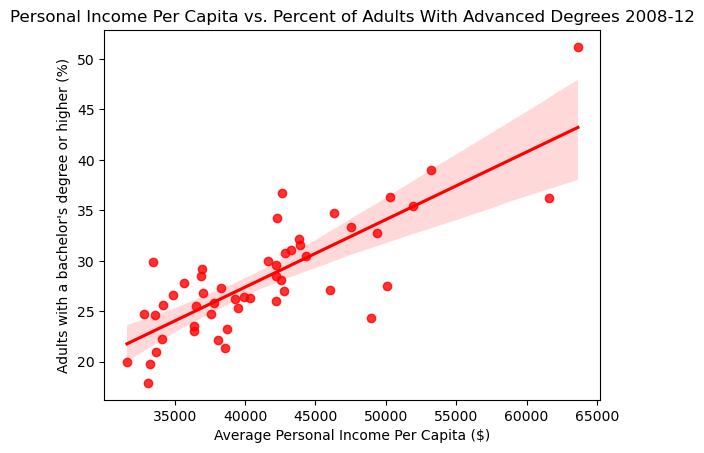

In [14]:
# linear regression plot for the correlation between average personal income per capita for each state and the percentage of adults who have a bachelors degree or higher
sns.regplot(data=pi_ad_df2, x="avg_pi_2008-12", y="Percent of adults with a bachelor's degree or higher, 2008-12", color="red")
plt.xlabel("Average Personal Income Per Capita ($)")
plt.ylabel("Adults with a bachelor's degree or higher (%)")
plt.title("Personal Income Per Capita vs. Percent of Adults With Advanced Degrees 2008-12")
plt.savefig("PIPC_AD_08-12.png",
                bbox_inches='tight')
plt.show()

In [15]:
# adding student resource data for 2008-2010 to the second sub dataframe
pi_ad_df2["students_resources_2005-06"] = enrollment_df["2005-06"].astype(str)
pi_ad_df2["students_resources_2005-06"] = pi_ad_df2["students_resources_2005-06"].str.replace(",", "").astype(float)
pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2018-22"] = pd.to_numeric(pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"], errors='coerce')
pi_ad_df2["Percent of adults with less than a high school diploma, 2018-22"] = pd.to_numeric(education_df["Percent of adults with less than a high school diploma, 2018-22"], errors='coerce')
pi_ad_df2["Percent of adults with a high school diploma only, 2018-22"] = pd.to_numeric(education_df["Percent of adults with a high school diploma only, 2018-22"], errors='coerce')
pi_ad_df2["Percent of adults completing some college or associate's degree, 2018-22"] = pd.to_numeric(education_df["Percent of adults completing some college or associate's degree, 2018-22"], errors='coerce')
pi_ad_df2

C:\Users\asand\AppData\Local\Temp\ipykernel_2532\3101158478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df2["students_resources_2005-06"] = enrollment_df["2005-06"].astype(str)
C:\Users\asand\AppData\Local\Temp\ipykernel_2532\3101158478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df2["students_resources_2005-06"] = pi_ad_df2["students_resources_2005-06"].str.replace(",", "").astype(float)
C:\Users\asand\AppData\Local\Temp\ipykernel_2532\3101158478.py:4: SettingWithCopyWarning: 
A

,State,2008,2009,2010,2011,2012,"Percent of adults with a bachelor's degree or higher, 2008-12",avg_pi_2008-12,students_resources_2005-06,"Percent of adults with a bachelor's degree or higher, 2018-22","Percent of adults with less than a high school diploma, 2018-22","Percent of adults with a high school diploma only, 2018-22","Percent of adults completing some college or associate's degree, 2018-22"
0,Alabama,33441.0,32717.0,33849.0,34887.0,35564.0,22.3,34091.6,743626.0,27.2,12.3,30.4,30.1
1,Alaska,47800.0,47211.0,49543.0,52415.0,53340.0,27.5,50061.8,133288.0,30.7,6.5,28.8,33.9
2,Arizona,35586.0,33467.0,33774.0,35244.0,36333.0,26.6,34880.8,1094454.0,31.8,11.3,23.6,33.3
3,Arkansas,32157.0,31411.0,32218.0,34180.0,36287.0,19.8,33250.6,474206.0,24.7,11.8,34.1,29.3
4,California,43391.0,41660.0,43138.0,45509.0,47794.0,30.5,44298.4,6312103.0,35.9,15.6,20.4,28.1
5,Colorado,42961.0,40258.0,40827.0,43732.0,45490.0,36.7,42653.6,779826.0,43.7,7.5,20.4,28.4
6,Connecticut,60543.0,59586.0,61392.0,62964.0,63555.0,36.2,61608.0,575058.0,41.4,8.7,25.8,24.1
7,Delaware,41254.0,41056.0,41101.0,43781.0,43775.0,28.5,42193.4,120937.0,34.5,8.8,29.7,27.1
8,District of Columbia,60609.0,60011.0,63182.0,66950.0,67470.0,51.2,63644.4,76876.0,62.6,7.3,15.0,15.0
9,Florida,39185.0,36777.0,38778.0,40433.0,41204.0,26.2,39275.4,2675024.0,32.3,10.7,27.7,29.2


In [16]:
# finding the correlation between the average number of students using additional educational resources and the percentage of 
# adults with a bachelors degree or higher 
pi_ad_df2["students_resources_2005-06"] = pd.to_numeric(pi_ad_df2["students_resources_2005-06"], errors='coerce')
correlation = pi_ad_df2["students_resources_2005-06"].corr(pi_ad_df2["Percent of adults with a bachelor's degree or higher, 2018-22"])
correlation

C:\Users\asand\AppData\Local\Temp\ipykernel_2532\2332531820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pi_ad_df2["students_resources_2005-06"] = pd.to_numeric(pi_ad_df2["students_resources_2005-06"], errors='coerce')


0.04339245783784156

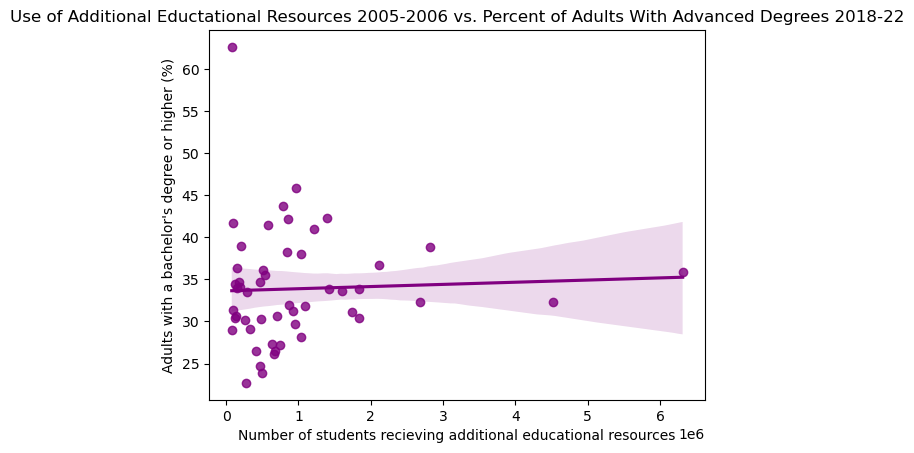

In [17]:
# linear regression plot for the correlation between number of students for each state recieving additional educational resources
# and the percentage of adults who have a bachelors degree or higher
sns.regplot(data=pi_ad_df2, x="students_resources_2005-06", y="Percent of adults with a bachelor's degree or higher, 2018-22", color="purple")
plt.xlabel("Number of students recieving additional educational resources")
plt.ylabel("Adults with a bachelor's degree or higher (%)")
plt.title("Use of Additional Eductational Resources 2005-2006 vs. Percent of Adults With Advanced Degrees 2018-22")
plt.savefig("ER_05-06_AD_18-22.png",
                bbox_inches='tight')
plt.show()

In [18]:
# finding the correlation between the average number of students using additional educational resources and the percentage of 
# adults with less than a high school diploma
correlation = pi_ad_df2["students_resources_2005-06"].corr(pi_ad_df2["Percent of adults with less than a high school diploma, 2018-22"])
correlation

0.5463593779625723

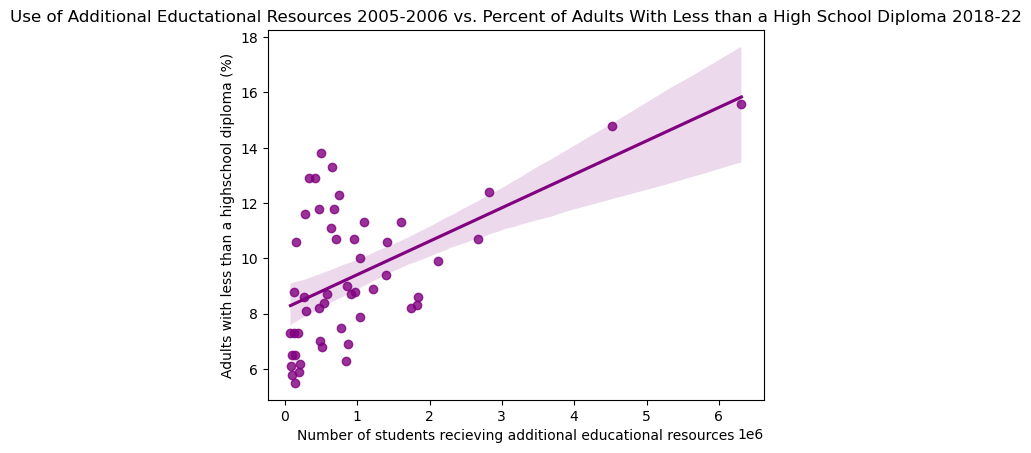

In [19]:
# linear regression plot for the correlation between number of students for each state recieving additional educational resources
# and the percentage of adults who have a degree less than a high school diploma
sns.regplot(data=pi_ad_df2, x="students_resources_2005-06", y="Percent of adults with less than a high school diploma, 2018-22", color="purple")
plt.xlabel("Number of students recieving additional educational resources")
plt.ylabel("Adults with less than a highschool diploma (%)")
plt.title("Use of Additional Eductational Resources 2005-2006 vs. Percent of Adults With Less than a High School Diploma 2018-22")
plt.savefig("ER_05-06_HD_18-22.png",
                bbox_inches='tight')
plt.show()

In [20]:
# finding the correlation between the average number of students using additional educational resources and the percentage of 
# adults with only a high school diploma
correlation = pi_ad_df2["students_resources_2005-06"].corr(pi_ad_df2["Percent of adults with a high school diploma only, 2018-22"])
correlation

-0.2173258252404852

In [21]:
# finding the correlation between the average number of students using additional educational resources and the percentage of 
# adults with some college or associates degree
correlation = pi_ad_df2["students_resources_2005-06"].corr(pi_ad_df2["Percent of adults completing some college or associate's degree, 2018-22"])
correlation

-0.1860134018890582

In [22]:
# flipping the rows and columns for the pi_df
pi_df_transposed = pi_df.transpose()
pi_df_transposed = pi_df.set_index("State").T
pi_df_transposed = pi_df_transposed[~pi_df_transposed.index.isin(["FIPS", "Metric"])]
years = [str(year) for year in range(1929, 1970)]
pi_df_transposed = pi_df_transposed[~pi_df_transposed.index.isin(years)]
pi_df_transposed["Year"] = pi_df_transposed.index.astype(str)
pi_df_transposed = pi_df_transposed.replace("(NA)", 0)
pi_df_transposed 

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
1970,3081.0,5911.0,4020.0,2915.0,4965.0,4290.0,5158.0,4724.0,5528.0,4131.0,...,3264.0,3782.0,3558.0,3728.0,4157.0,4400.0,3156.0,3988.0,4038.0,1970
1971,3345.0,6269.0,4354.0,3176.0,5209.0,4671.0,5394.0,5032.0,6191.0,4433.0,...,3538.0,4007.0,3855.0,3967.0,4505.0,4595.0,3418.0,4251.0,4404.0,1971
1972,3672.0,6636.0,4711.0,3504.0,5652.0,5064.0,5800.0,5446.0,6781.0,4860.0,...,3906.0,4352.0,4179.0,4294.0,4922.0,4955.0,3729.0,4609.0,4856.0,1972
1973,4088.0,7525.0,5145.0,4069.0,6123.0,5579.0,6319.0,5979.0,7246.0,5371.0,...,4384.0,4835.0,4520.0,4661.0,5424.0,5532.0,4062.0,5125.0,5571.0,1973
1974,4477.0,8827.0,5546.0,4453.0,6731.0,6142.0,6879.0,6426.0,8004.0,5757.0,...,4778.0,5342.0,4930.0,4996.0,5924.0,6152.0,4481.0,5605.0,6317.0,1974
1975,4918.0,11205.0,5825.0,4769.0,7320.0,6670.0,7367.0,6844.0,8834.0,6107.0,...,5138.0,5947.0,5341.0,5401.0,6404.0,6831.0,4991.0,6099.0,6853.0,1975
1976,5438.0,12447.0,6309.0,5247.0,7975.0,7211.0,7951.0,7430.0,9548.0,6557.0,...,5664.0,6528.0,5866.0,5928.0,6969.0,7424.0,5455.0,6676.0,7309.0,1976
1977,5920.0,12789.0,6858.0,5736.0,8681.0,7854.0,8752.0,7971.0,10469.0,7182.0,...,6174.0,7124.0,6412.0,6339.0,7613.0,8062.0,6012.0,7416.0,8203.0,1977
1978,6609.0,13018.0,7768.0,6546.0,9661.0,8824.0,9720.0,8696.0,11349.0,8064.0,...,6943.0,8023.0,7119.0,7171.0,8514.0,9101.0,6641.0,8249.0,9361.0,1978
1979,7275.0,13744.0,8712.0,7090.0,10758.0,9818.0,10909.0,9549.0,12204.0,8941.0,...,7620.0,8978.0,7747.0,7939.0,9425.0,10156.0,7335.0,9172.0,10436.0,1979


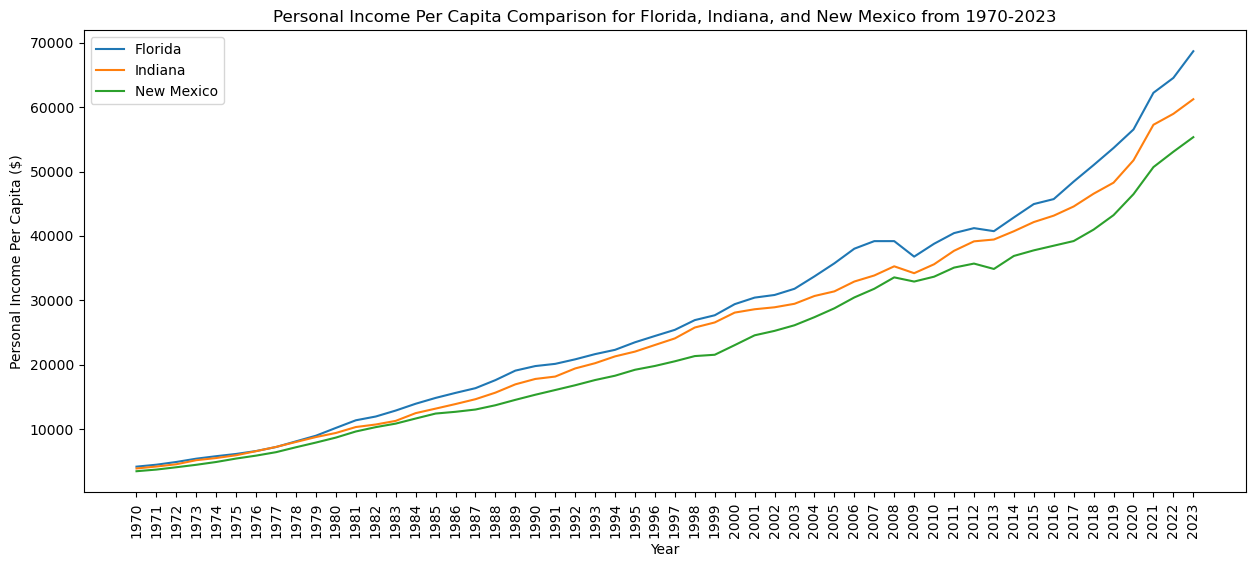

In [23]:
# creatinga time series plot for the 1st, 25th, and 50th ranked states in education for personal income per capita
pi_df_transposed["Florida"] = pd.to_numeric(pi_df_transposed["Florida"], errors="coerce")
pi_df_transposed["Indiana"] = pd.to_numeric(pi_df_transposed["Indiana"], errors="coerce")
pi_df_transposed["New Mexico"] = pd.to_numeric(pi_df_transposed["New Mexico"], errors="coerce")
plt.figure(figsize=(15, 6))
sns.lineplot(data=pi_df_transposed, x="Year", y="Florida", label="Florida")
sns.lineplot(data=pi_df_transposed, x="Year", y="Indiana", label="Indiana")
sns.lineplot(data=pi_df_transposed, x="Year", y="New Mexico", label="New Mexico")
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Personal Income Per Capita ($)")
plt.title("Personal Income Per Capita Comparison for Florida, Indiana, and New Mexico from 1970-2023")
plt.legend()
plt.savefig("PIPC_FL_IN_NM.png",
                bbox_inches='tight')
plt.show()

In [24]:
rows_to_keep = [9, 14, 31]
columns_to_keep = [ "State",
    "Percent of adults completing four years of college or higher, 1970",
    "Percent of adults completing four years of college or higher, 1980",
    "Percent of adults with a bachelor's degree or higher, 1990",
    "Percent of adults with a bachelor's degree or higher, 2000",
    "Percent of adults with a bachelor's degree or higher, 2008-12",
    "Percent of adults with a bachelor's degree or higher, 2018-22"]
education_df_filtered = education_df.loc[rows_to_keep, columns_to_keep]
education_df_transposed = education_df_filtered.transpose()
education_df_transposed = education_df_filtered.set_index("State").T
education_df_transposed["Year"] = ["1970", "1980", "1990", "2000", "2008-2012", "2018-2022"]
education_df_transposed

State,FL,IN,NM,Year
0,,,,
"Percent of adults completing four years of college or higher, 1970",10.3,8.3,12.7,1970
"Percent of adults completing four years of college or higher, 1980",14.9,12.5,17.6,1980
"Percent of adults with a bachelor's degree or higher, 1990",18.3,15.6,20.4,1990
"Percent of adults with a bachelor's degree or higher, 2000",22.3,19.4,23.5,2000
"Percent of adults with a bachelor's degree or higher, 2008-12",26.2,23.0,25.6,2008-2012
"Percent of adults with a bachelor's degree or higher, 2018-22",32.3,28.2,29.1,2018-2022


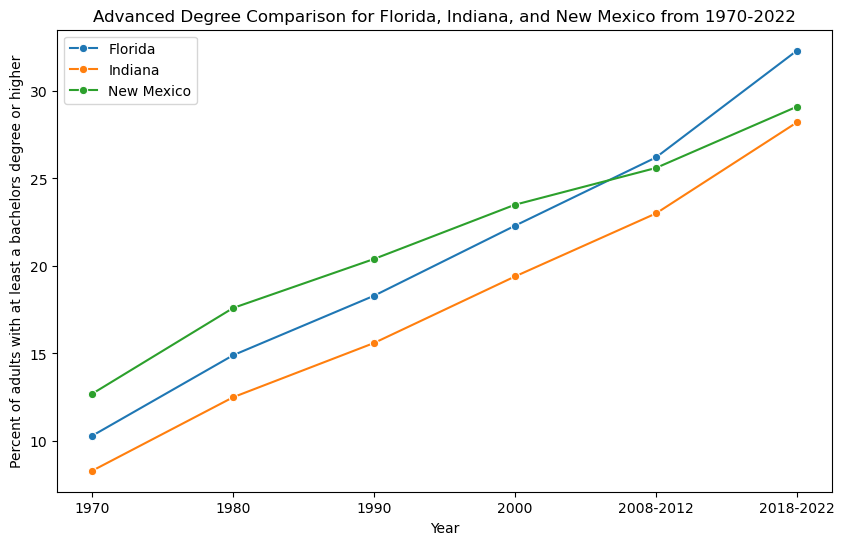

In [25]:
# creatinga time series plot for the 1st, 25th, and 50th ranked states in education for the percentage of adults who have 
# a bachelors degree or higher
education_df_transposed["FL"] = pd.to_numeric(education_df_transposed["FL"], errors="coerce")
education_df_transposed["IN"] = pd.to_numeric(education_df_transposed["IN"], errors="coerce")
education_df_transposed["NM"] = pd.to_numeric(education_df_transposed["NM"], errors="coerce")
plt.figure(figsize=(10, 6))
sns.lineplot(data=education_df_transposed, x="Year", y="FL", marker="o", label="Florida")
sns.lineplot(data=education_df_transposed, x="Year", y="IN", marker="o", label="Indiana")
sns.lineplot(data=education_df_transposed, x="Year", y="NM", marker="o", label="New Mexico")
plt.xlabel("Year")
plt.ylabel("Percent of adults with at least a bachelors degree or higher")
plt.title("Advanced Degree Comparison for Florida, Indiana, and New Mexico from 1970-2022")
plt.legend()
plt.savefig("AD_FL_IN_NM.png",
                bbox_inches='tight')
plt.show()

In [26]:
# prediction linear regression model 
X_train, X_test, y_train, y_test = train_test_split(pi_ad_df[["avg_pi_2018-22"]], pi_ad_df["Percent of adults with a bachelor's degree or higher, 2018-22"], random_state=0)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# predictions for the percentage of adults in the state (index = state in alphabetical order nuber including DC) who have an advanced degree based on 
# the average personal income from the years 2018-2022
predictions = linear_regression_model.predict(X_test)
results = pd.DataFrame()
results["Actual"] = y_test
results["Predicted"] = predictions
results

,Actual,Predicted
29,39.0,40.358900
11,34.7,33.182637
10,33.6,29.727116
22,31.1,30.175897
2,31.8,29.852578
28,26.5,32.263635
45,41.7,33.505426
32,38.8,42.245474
26,34.0,31.170335
4,35.9,41.522607
